In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
normalize = layers.Normalization()

In [5]:
normalize.adapt(abalone_features)

Metal device set to: Apple M1


2022-07-15 16:42:38.891347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 16:42:38.891640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-15 16:42:38.938814: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 16:42:39.006975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 16:42:39.023616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
 15/104 [===>..........................] - ETA: 0s - loss: 104.5087

2022-07-15 16:42:39.497096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


104/104 [==============================] - 1s 4ms/step - loss: 93.0216
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 54.2097
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 16.8069
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 5.9595
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 5.0649
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9809
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9520
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9394
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9493
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 4.9215


###### Mixed Data Type

In [7]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [8]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [9]:
# # Create symbolic Input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [10]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [11]:
print(calc(1))
print(calc(2))

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)


###### make pandas datatype to dictionary of input layer of tensorflow datatype

In [12]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    
    inputs[name] = tf.keras.Input(shape=(1, ), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

inputs(dictionary)은 titanic_features(dataframe)의 data type을 tf.dtype으로 변형한 변수

dicionary & tf.dtype으로 바꾼 것은 list형태의 concatenate입력으로 사용하여 tf.layer형태로 변형하고 이것을 adapted된 normalization에 입력으로 사용하기 위해서(추정)
concatenate의 입력은 a list of input tensors(1d)

###### check out numeric data and normalize

In [13]:
numeric_inputs = {name:input for name, input in inputs.items() if input.dtype == tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
# # later, check that change titanic_feature[name] to numeric_inputs[name]
norm.adapt(np.array(titanic_features[numeric_inputs.keys()]))

all_numeric_inputs = norm(x)
all_numeric_inputs

2022-07-15 16:42:43.669050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 16:42:43.683489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [14]:
# # normalize 된 tf.dtype
preprocessed_inputs = [all_numeric_inputs]

In [15]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
    print(name)
    # # df[name]의 단어를 lookup으로 만들고
    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    # # lookup을 one-hot encoding 하는 것
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())
    
    # # 만들어진 해당 name에 대한 lookup을 tf.dtype으로 만들어둔 inputs[name] 에 적용한 후, one_hot encodding
    x = lookup(input)
    x = one_hot(x)
    
    # # integer indices & one-hot encodding 된 tf.string형태의 layer를 추가
    preprocessed_inputs.append(x)

sex
class
deck
embark_town
alone


In [16]:
preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>]

In [17]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

In [18]:
preprocessed_inputs_cat

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'concatenate_1')>

###### 아래 model을 만들기 위해서 위의 과정을 거침함
titanic csv를 pd.df로 만들고 pd.df는 normal adapt, lookup의 raw data가 되게 함
normalize는 number type의 계층 각각을 하는 것이 아니라 모아서 한번에 진행
normalize시는 adapt된 것을 tf.dtype으로 만든 inputs의 values를 쌓아서 적용
그리고 나서 모든 층을 concatenate 함

In [19]:
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

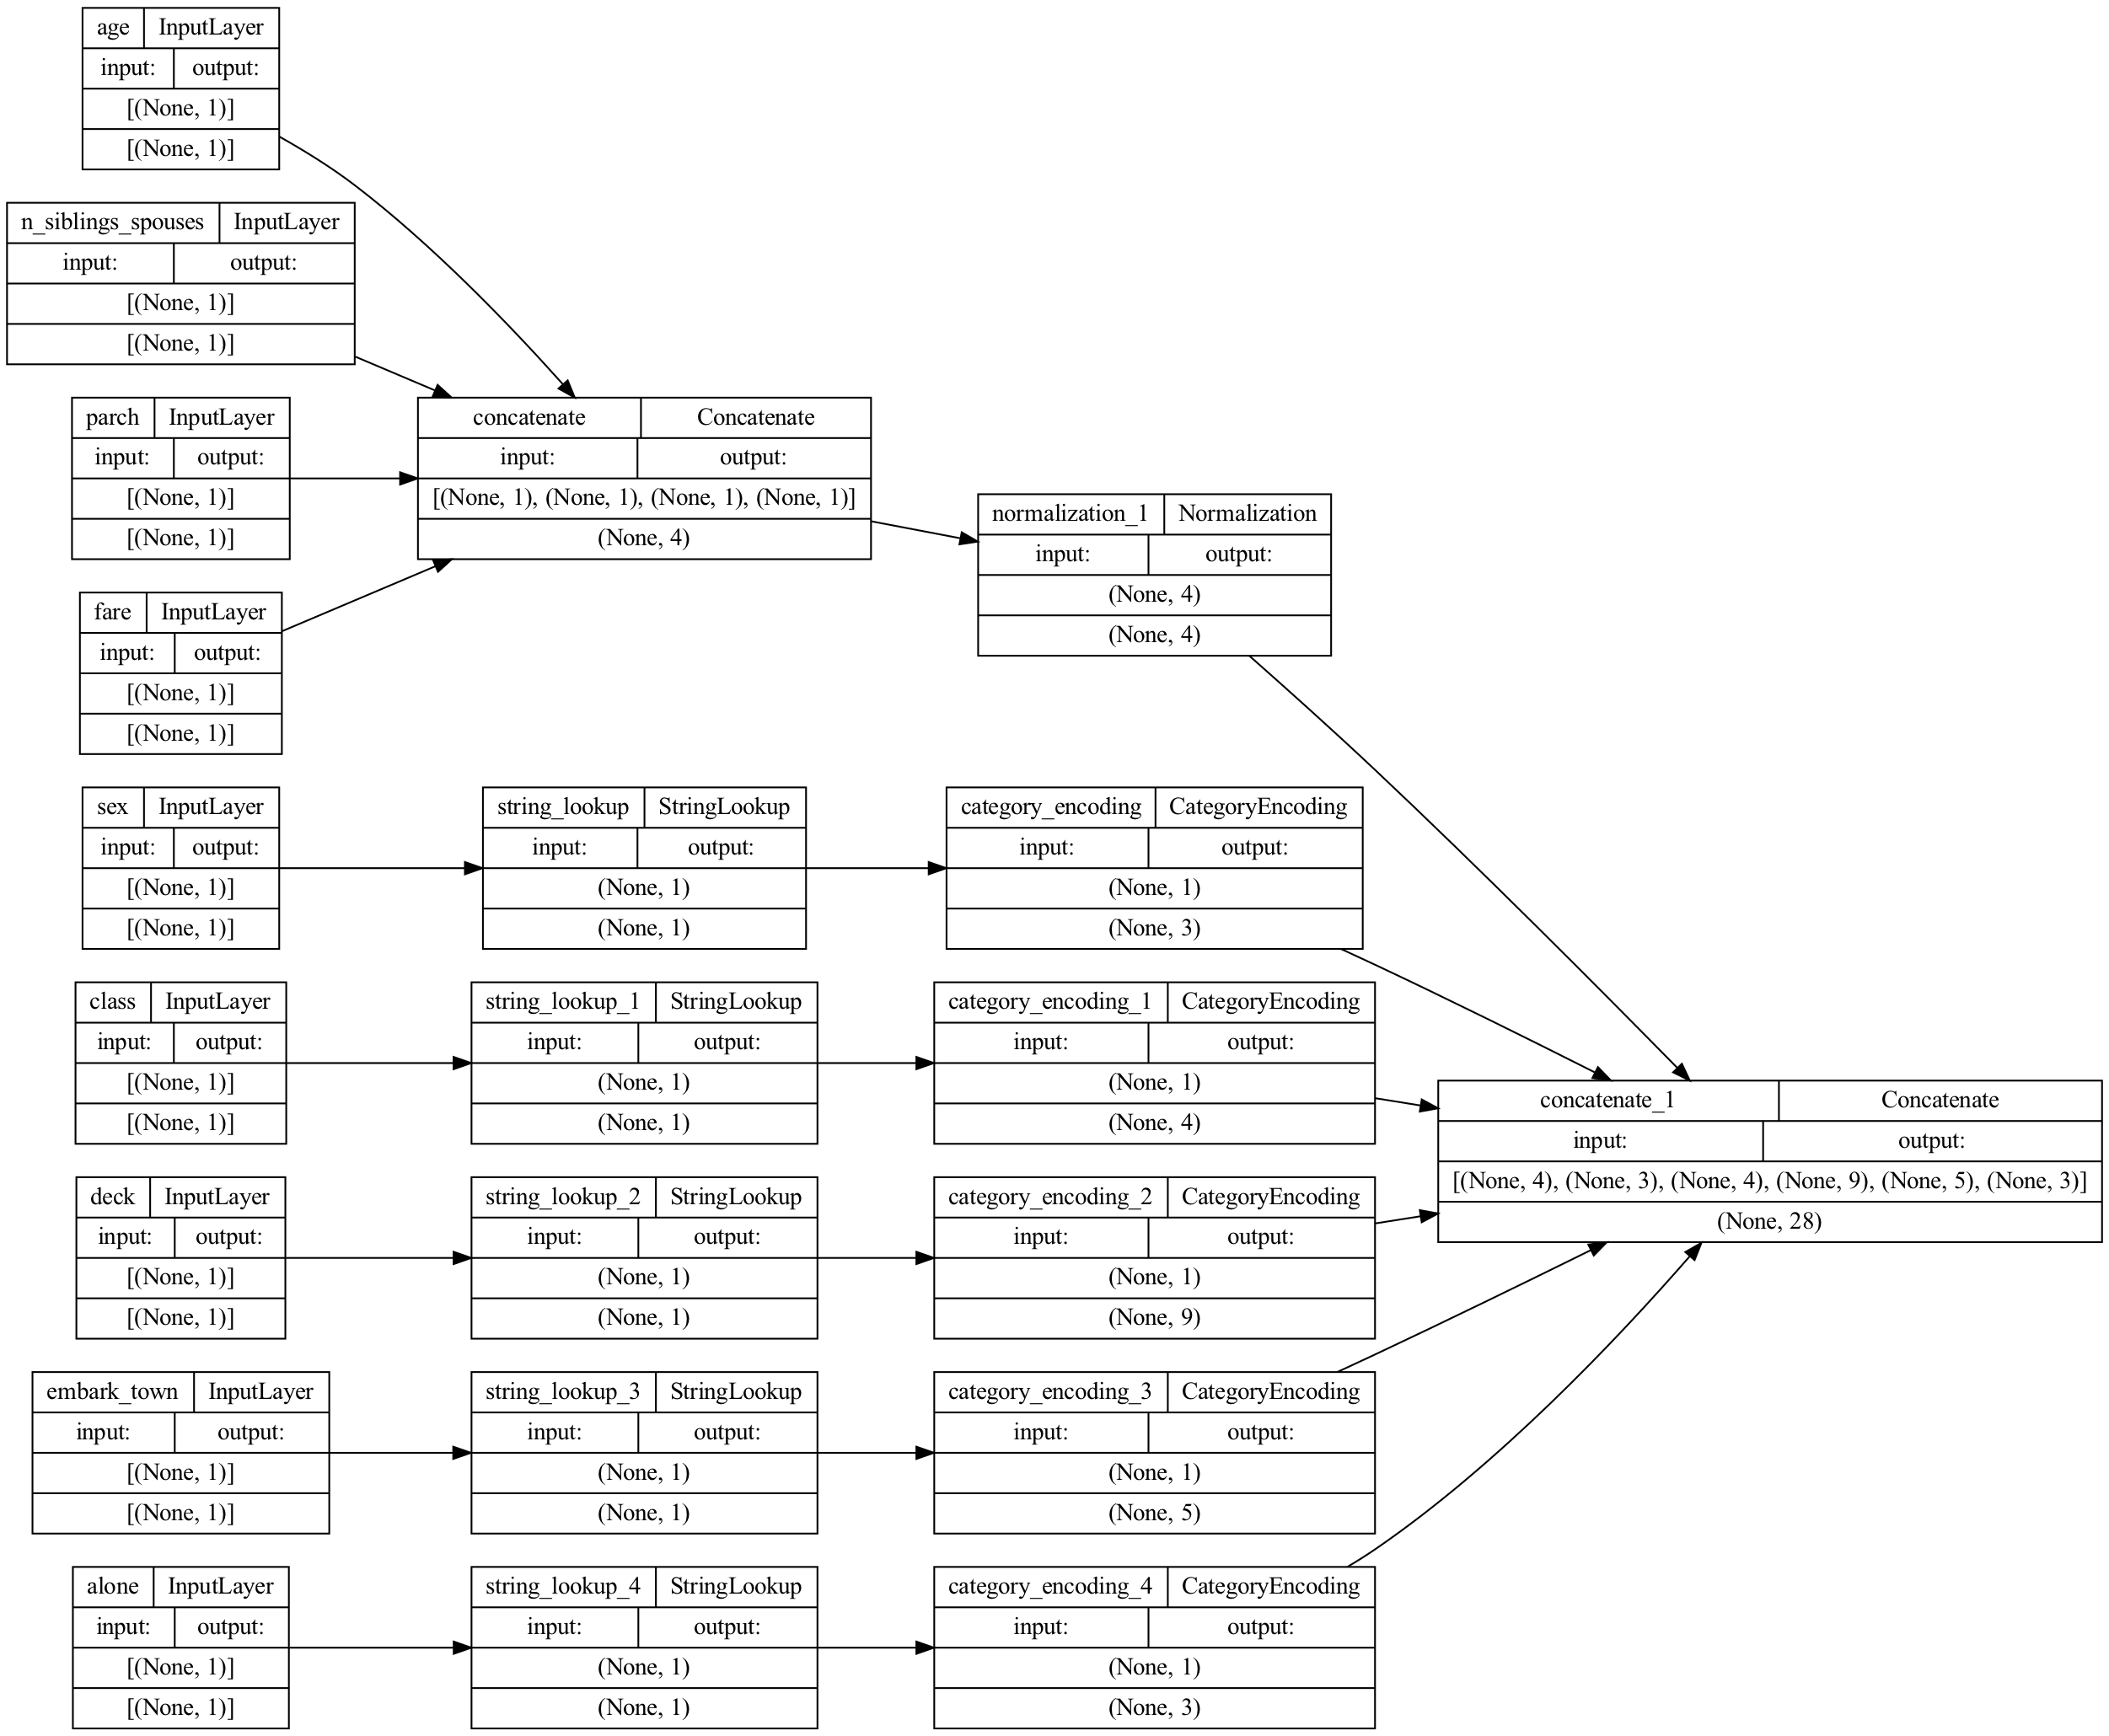

In [20]:
tf.keras.utils.plot_model(model=titanic_preprocessing, rankdir='LR', dpi=150, show_shapes=True)

In [21]:
titanic_features_dict = {name: np.array(value) for name, value in titanic_features.items()}

In [22]:
features_dict = {name: value[:1] for name, value in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [23]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])
    
    preprocessed_inputs = preprocessing_head(inputs)
    results = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, results)
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam())
    
    return model

In [24]:
titanic_model = titanic_model(titanic_preprocessing, inputs)

In [25]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
 7/20 [=========>....................] - ETA: 0s - loss: 0.8615

2022-07-15 16:42:44.674490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 10ms/step - loss: 0.8658
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.7373
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6529
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5941
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5441
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5117
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4838
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4653
Epoch 9/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4521
Epoch 10/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4429


In [26]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

2022-07-15 16:42:46.957048: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: test/assets


2022-07-15 16:42:49.945189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 16:42:49.951576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 16:42:49.958019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 16:42:49.963958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-15 16:42:49.970272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-2.011]], shape=(1, 1), dtype=float32)
tf.Tensor([[-2.011]], shape=(1, 1), dtype=float32)


In [28]:
import itertools

def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name:values[i] for name, values in features.items()}
        yield example

In [33]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [34]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [35]:
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'
